In [1]:
import logging
import os

import gym
import matplotlib.pyplot as plt

from sac.agent import SacAgent
from sac.trainer import SacTrainer
from sac.dataclasses import TrainArguments
from sac.utils import Network

logging.basicConfig(level=logging.INFO)

In [9]:
env = gym.make("LunarLander-v2")
agent = SacAgent(
    Network(
        [
            env.observation_space.shape[0], 
            128,
            128,
            env.action_space.n,
        ],
    ),
)
agent.network

Network(
  (network): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [10]:
train_args = TrainArguments(
    num_episodes=2000, 
    alpha=None, 
    batch_size=64, 
    policy_network_lr=5e-4, 
    q_network_lr=5e-4,
    alpha_lr=1e-4,
    max_entropy_ratio=0.5,
)
trainer = SacTrainer(train_args)
train_args

TrainArguments(num_episodes=2000, gamma=0.99, alpha=None, batch_size=64, policy_network_lr=0.0005, q_network_lr=0.0005, alpha_lr=0.0001, q_network_update_tau=0.01, q_network_hidden_sizes=(128, 128), max_trajectory_length=1000, num_q_networks=2, max_entropy_ratio=0.5)

In [11]:
q_value_losses, policy_losses, history = trainer.train(
    agent, 
    env, 
    history_file_path=os.path.join("histories", "LunarLander-v2_sac.jsonl")
)

  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=4, bias=True)
) doesn't have reset_parameters method
INFO:sac.trainer:Use trained alpha: target_entropy = 0.69
INFO:sac.trainer:Episode №1
INFO:sac.trainer:Alpha = 1.00
INFO:sac.trainer:Total reward: -205.61
INFO:sac.trainer:Episode №2
INFO:sac.trainer:Alpha = 1.00
INFO:sac.trainer:Total reward: -336.47
INFO:sac.trainer:Episode №3
INFO:sac.trainer:Alpha = 0.99
INFO:sac.trainer:Total reward: -624.26
INFO:sac.trainer:Episode №4
INFO:sac.trainer:Alpha = 0.98
INFO:sac.trainer:Total reward: -533.70
INFO:sac.trainer:Episode №5
INFO:sac.trainer:Alpha = 0.98
INFO:sac.trainer:Total reward: -106.82
INFO:sac.trainer:Episode №6
INFO:sac.trainer:Alpha = 0.98
INFO:sac.trainer:Total reward: -42.14
INFO:sac.trainer:Episode №7
INFO:sac.trainer:Alpha = 0.97
INFO:sac.trainer:Total reward: 44.68
INFO:sac.trainer:Episod

In [16]:
agent.save("agents/lunar_lander_sac.pth")

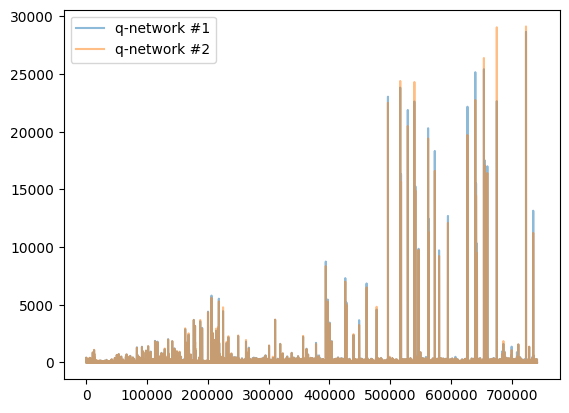

In [17]:
for i_network, network_q_value_losses in enumerate(q_value_losses):
    plt.plot(
        network_q_value_losses, 
        label=f"q-network #{i_network + 1}", 
        alpha=0.5
    )
plt.legend()

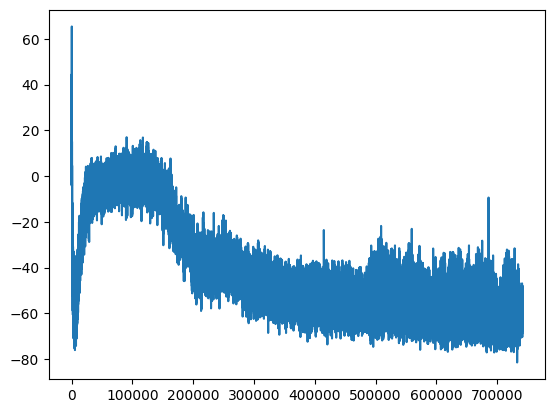

In [18]:
plt.plot(policy_losses)

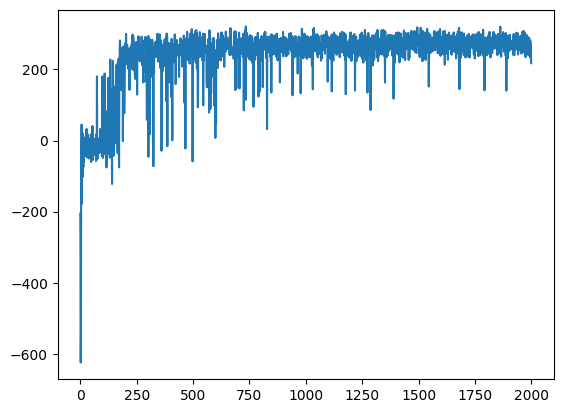

In [19]:
plt.plot(
    [sum(trajectory["rewards"]) for trajectory in history]
)